<a href="https://colab.research.google.com/github/rahulbaburaj1/ANN-Customer_Churn_Prediction/blob/main/ANN_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
df = pd.read_csv("Churn_Modelling.csv")

In [102]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [104]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [107]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [108]:
df.shape

(10000, 14)

In [109]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [110]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [111]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [112]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [113]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [115]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [116]:
x = df.drop(columns = ['Exited'])
y = df['Exited']
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [117]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Train - Test Split**

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

**Scaling Data**

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [120]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [121]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [124]:
hist = model.fit(x_train,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7894 - val_loss: 0.4679 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.8044 - val_loss: 0.4294 - val_accuracy: 0.8194
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8177 - val_loss: 0.4121 - val_accuracy: 0.8250
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8239 - val_loss: 0.3994 - val_accuracy: 0.8344
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8347 - val_loss: 0.3869 - val_accuracy: 0.8431
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8441 - val_loss: 0.3754 - val_accuracy: 0.8487
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8502 - val_loss: 0.3645 - val_accuracy: 0.8519

In [125]:
#weights
model.layers[0].get_weights()

[array([[ 6.92424700e-02,  4.18692559e-01,  2.84989122e-02,
         -2.30654199e-02, -1.20585086e-02, -3.51630181e-01,
          5.11334687e-02,  7.37360269e-02, -2.10765824e-01,
         -1.46906674e-01, -4.04597372e-01],
        [ 6.05957843e-02, -1.08060695e-01,  6.65718317e-01,
          1.69162918e-02, -2.36051962e-01,  1.49307191e+00,
         -4.68070239e-01, -1.17358375e+00, -5.53977013e-01,
          4.42692965e-01,  1.50619131e-02],
        [-1.01774052e-01,  1.27594665e-01, -1.64354108e-02,
          4.18470055e-01, -1.28403947e-01,  1.22403964e-01,
         -4.02252190e-02,  3.27841043e-01, -4.19189669e-02,
         -8.28635246e-02,  1.40420511e-01],
        [ 2.06307262e-01, -8.36121440e-01, -2.71666586e-01,
          2.40856990e-01,  7.61176273e-02,  2.41848171e-01,
         -8.28780383e-02,  3.64906818e-01,  2.48472080e-01,
         -1.92672014e-01,  1.77168295e-01],
        [ 1.09539580e+00, -3.26007187e-01,  6.54788315e-02,
         -3.59132558e-01,  3.83485854e-01,  

In [126]:
y_in = model.predict(x_test)

63/63 [==============================] - 0s 771us/step


In [127]:
#while y_in>0.5 = 1 else 0
y_pred = np.where(y_in > 0.5,1,0)

In [128]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8655

In [130]:
hist.history

{'loss': [0.5166993737220764,
  0.45889073610305786,
  0.43141797184944153,
  0.41413402557373047,
  0.398737370967865,
  0.3843168020248413,
  0.3726728558540344,
  0.3638943135738373,
  0.3571128845214844,
  0.35198429226875305,
  0.34944048523902893,
  0.3465288281440735,
  0.3444390892982483,
  0.3427054286003113,
  0.3418005108833313,
  0.3406279683113098,
  0.33856824040412903,
  0.33824700117111206,
  0.33732467889785767,
  0.33683550357818604,
  0.3355431854724884,
  0.33571866154670715,
  0.3346622884273529,
  0.33458220958709717,
  0.3341923654079437,
  0.33344870805740356,
  0.3335278332233429,
  0.3330589234828949,
  0.33288875222206116,
  0.33219295740127563,
  0.33187511563301086,
  0.33159419894218445,
  0.3313600420951843,
  0.3309204876422882,
  0.33093884587287903,
  0.33032235503196716,
  0.33006125688552856,
  0.3302200734615326,
  0.33014747500419617,
  0.32933440804481506,
  0.3294500708580017,
  0.32960978150367737,
  0.329415887594223,
  0.32868796586990356,
  0

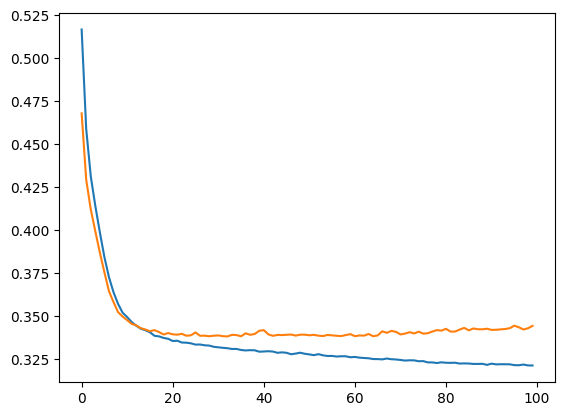

In [131]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

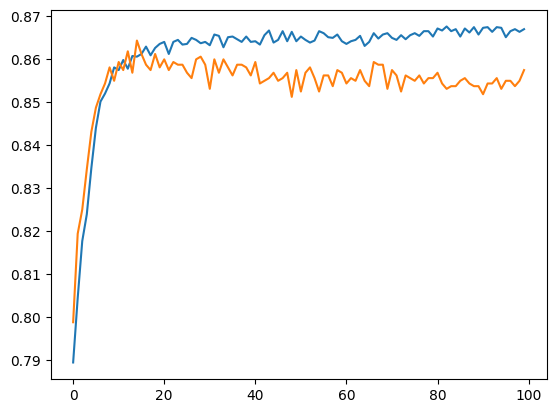

In [132]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])